In [52]:
import networkx as nx
import math
import numpy as np
import random
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import sys
import contextlib
import itertools
from math import comb
from numpy import linalg as LA
import math
from numpy.linalg import matrix_power
import matplotlib.pyplot as plt
from math import factorial as f
import networkx as nx
import itertools
import pandas as pd
from numpy.linalg import inv

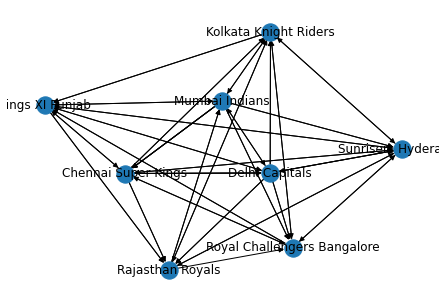

In [3]:
ipl = pd.read_csv("IPL_Matches_2008-2020.csv")
ipl.sample(5)
ipl.drop(ipl.index[756:], inplace=True)
ipl.drop(ipl.index[:696], inplace=True)
ipl.head(60)

df1 = ipl[['team1', 'team2','winner']]
df1=df1.reset_index()
df1.drop('index', inplace=True, axis=1)

df1.drop(df1.index[48], inplace=True)
df1=df1.reset_index()
df1.drop('index', inplace=True, axis=1)

l1 = [ [df1.loc[i][0],df1.loc[i][1]] for i in range(len(df1.index)) ]
l2 = [[df1.loc[i].iat[2]] for i in range(len(df1.index))]
l3 = [[x for x in l1[i] if x not in l2[i]] for i in range(len(df1.index))]
l4 = [l3[i][0] for i in range(len(df1.index))  ]
df1['loser']=l4


G = nx.from_pandas_edgelist(df1, 'winner', 'loser',create_using=nx.MultiDiGraph())
nx.draw(G, with_labels=True)


# make new graph with sum of weights on each edge
H = nx.DiGraph()
c=0
for u,v in G.edges():
    if H.has_edge(u,v):
        H[u][v]['weight'] += 1
    else:
        H.add_edge(u,v,weight=1)

Grev=G.reverse(copy=True)
L = nx.DiGraph()
c=0
for u,v in G.edges():
    if L.has_edge(v,u):
        L[v][u]['weight'] += 1
    else:
        L.add_edge(v,u,weight=1)

In [121]:
df1.head()

team1                        team2                 winner  \
0    Chennai Super Kings  Royal Challengers Bangalore    Chennai Super Kings   
1  Kolkata Knight Riders          Sunrisers Hyderabad  Kolkata Knight Riders   
2         Mumbai Indians               Delhi Capitals         Delhi Capitals   
3       Rajasthan Royals              Kings XI Punjab        Kings XI Punjab   
4         Delhi Capitals          Chennai Super Kings    Chennai Super Kings   

                         loser  
0  Royal Challengers Bangalore  
1          Sunrisers Hyderabad  
2               Mumbai Indians  
3             Rajasthan Royals  
4               Delhi Capitals

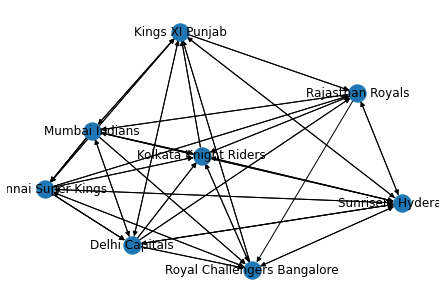

In [17]:

G = nx.from_pandas_edgelist(df1, 'winner', 'loser',create_using=nx.MultiDiGraph())

In [59]:
G.nodes()

NodeView(('Chennai Super Kings', 'Royal Challengers Bangalore', 'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Delhi Capitals', 'Mumbai Indians', 'Kings XI Punjab', 'Rajasthan Royals'))

In [14]:
size=[13000 for i in range(8)]
teamcolor=['yellow','red','purple','orange','#76EEC6','turquoise','grey','pink']
weights = nx.get_edge_attributes(H,'weight').values()
weightsL = nx.get_edge_attributes(L,'weight').values()

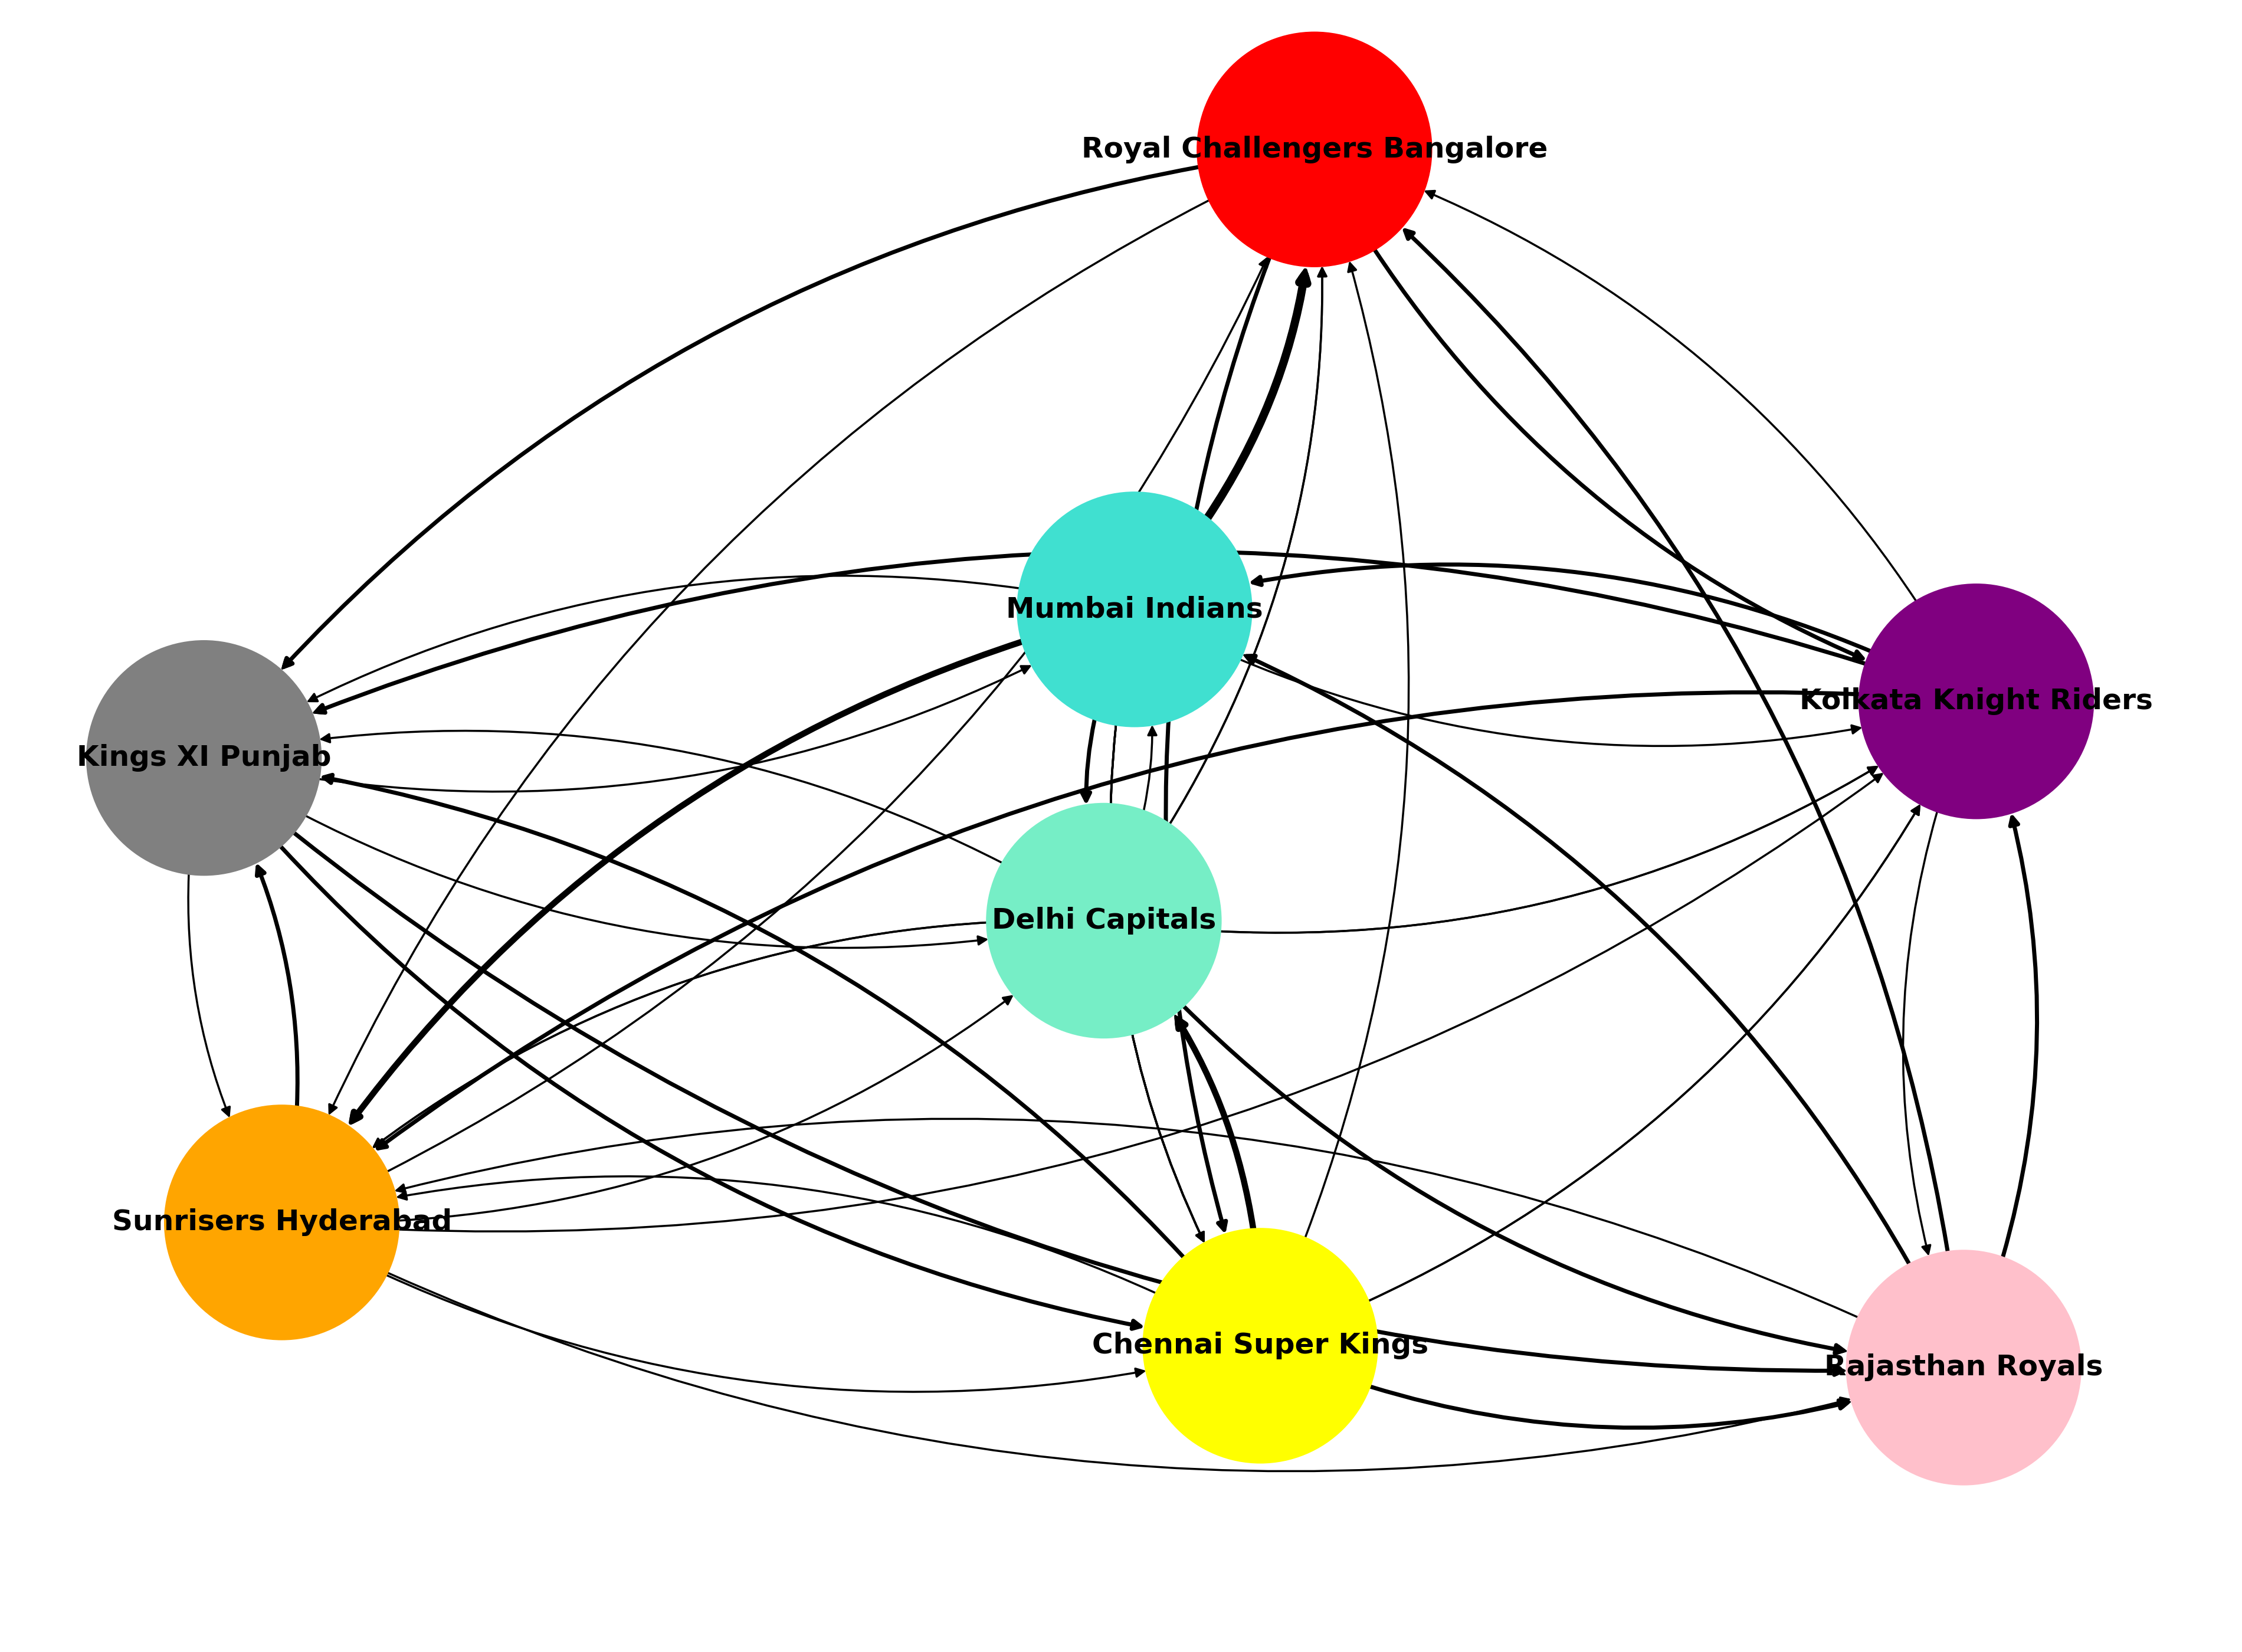

In [15]:
fig = plt.figure(1, figsize=(15, 11), dpi=250)
nx.draw(G, with_labels=True,
        font_weight='heavy', font_size=14, font_color='black',
        node_color=teamcolor, node_size=size,
        connectionstyle='arc3, rad = 0.2',
        width=list(weights)
       )
plt.show()

In [4]:
# make new graph with sum of weights on each edge
H = nx.DiGraph()
c=0
for u,v in G.edges():
    if H.has_edge(u,v):
        H[u][v]['weight'] += 1
    else:
        H.add_edge(u,v,weight=1)



In [5]:
nx.pagerank(H)

{'Chennai Super Kings': 0.1152175777649874,
 'Royal Challengers Bangalore': 0.12389679719935702,
 'Delhi Capitals': 0.09771591313336017,
 'Rajasthan Royals': 0.13451585879833966,
 'Kings XI Punjab': 0.14437608176446204,
 'Kolkata Knight Riders': 0.12801116819995773,
 'Sunrisers Hyderabad': 0.14488684147567482,
 'Mumbai Indians': 0.11137976166386128}

In [146]:
c=0
for i in H.nodes:
    c += H.in_degree(i)
print(c)

42


In [6]:
nst = {n: H.in_degree(n)  for n in H.nodes}
#nst = {n: 1 for n in H.nodes}
print(nst)
nx.pagerank(H, alpha = 0.85)

{'Chennai Super Kings': 4, 'Royal Challengers Bangalore': 6, 'Delhi Capitals': 4, 'Rajasthan Royals': 5, 'Kings XI Punjab': 6, 'Kolkata Knight Riders': 6, 'Sunrisers Hyderabad': 7, 'Mumbai Indians': 4}


{'Chennai Super Kings': 0.11109986875835574,
 'Royal Challengers Bangalore': 0.12583173311042298,
 'Delhi Capitals': 0.09318180682230597,
 'Rajasthan Royals': 0.13424373470394083,
 'Kings XI Punjab': 0.14799862007750367,
 'Kolkata Knight Riders': 0.12996857283201252,
 'Sunrisers Hyderabad': 0.1504475806551871,
 'Mumbai Indians': 0.1072280830402712}

In [32]:
print(a)

[0.09771591313336017, 0.11137976166386128, 0.1152175777649874, 0.12389679719935702, 0.12801116819995773, 0.13451585879833966, 0.14437608176446204, 0.14488684147567482]


In [37]:
L = nx.DiGraph()
c=0
for u,v in G.edges():
    if L.has_edge(v,u):
        L[v][u]['weight'] += 1
    else:
        L.add_edge(v,u,weight=1)

nx.pagerank(L, alpha = 0.85)

{'Royal Challengers Bangalore': 0.08439718774959012,
 'Chennai Super Kings': 0.1570183819902492,
 'Delhi Capitals': 0.14438871978279488,
 'Rajasthan Royals': 0.10867761217947576,
 'Kings XI Punjab': 0.12113336546124887,
 'Kolkata Knight Riders': 0.10477299471885329,
 'Sunrisers Hyderabad': 0.10278814214037106,
 'Mumbai Indians': 0.1768235959774167}

In [26]:
Grev.nodes()

NodeView(('Chennai Super Kings', 'Royal Challengers Bangalore', 'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Delhi Capitals', 'Mumbai Indians', 'Kings XI Punjab', 'Rajasthan Royals'))

In [43]:
labeldict={}
for i in Grev.nodes():
    labeldict[i]= i+"\n"+str(nx.pagerank(L, alpha = 0.85, personalization=nst).get(i))

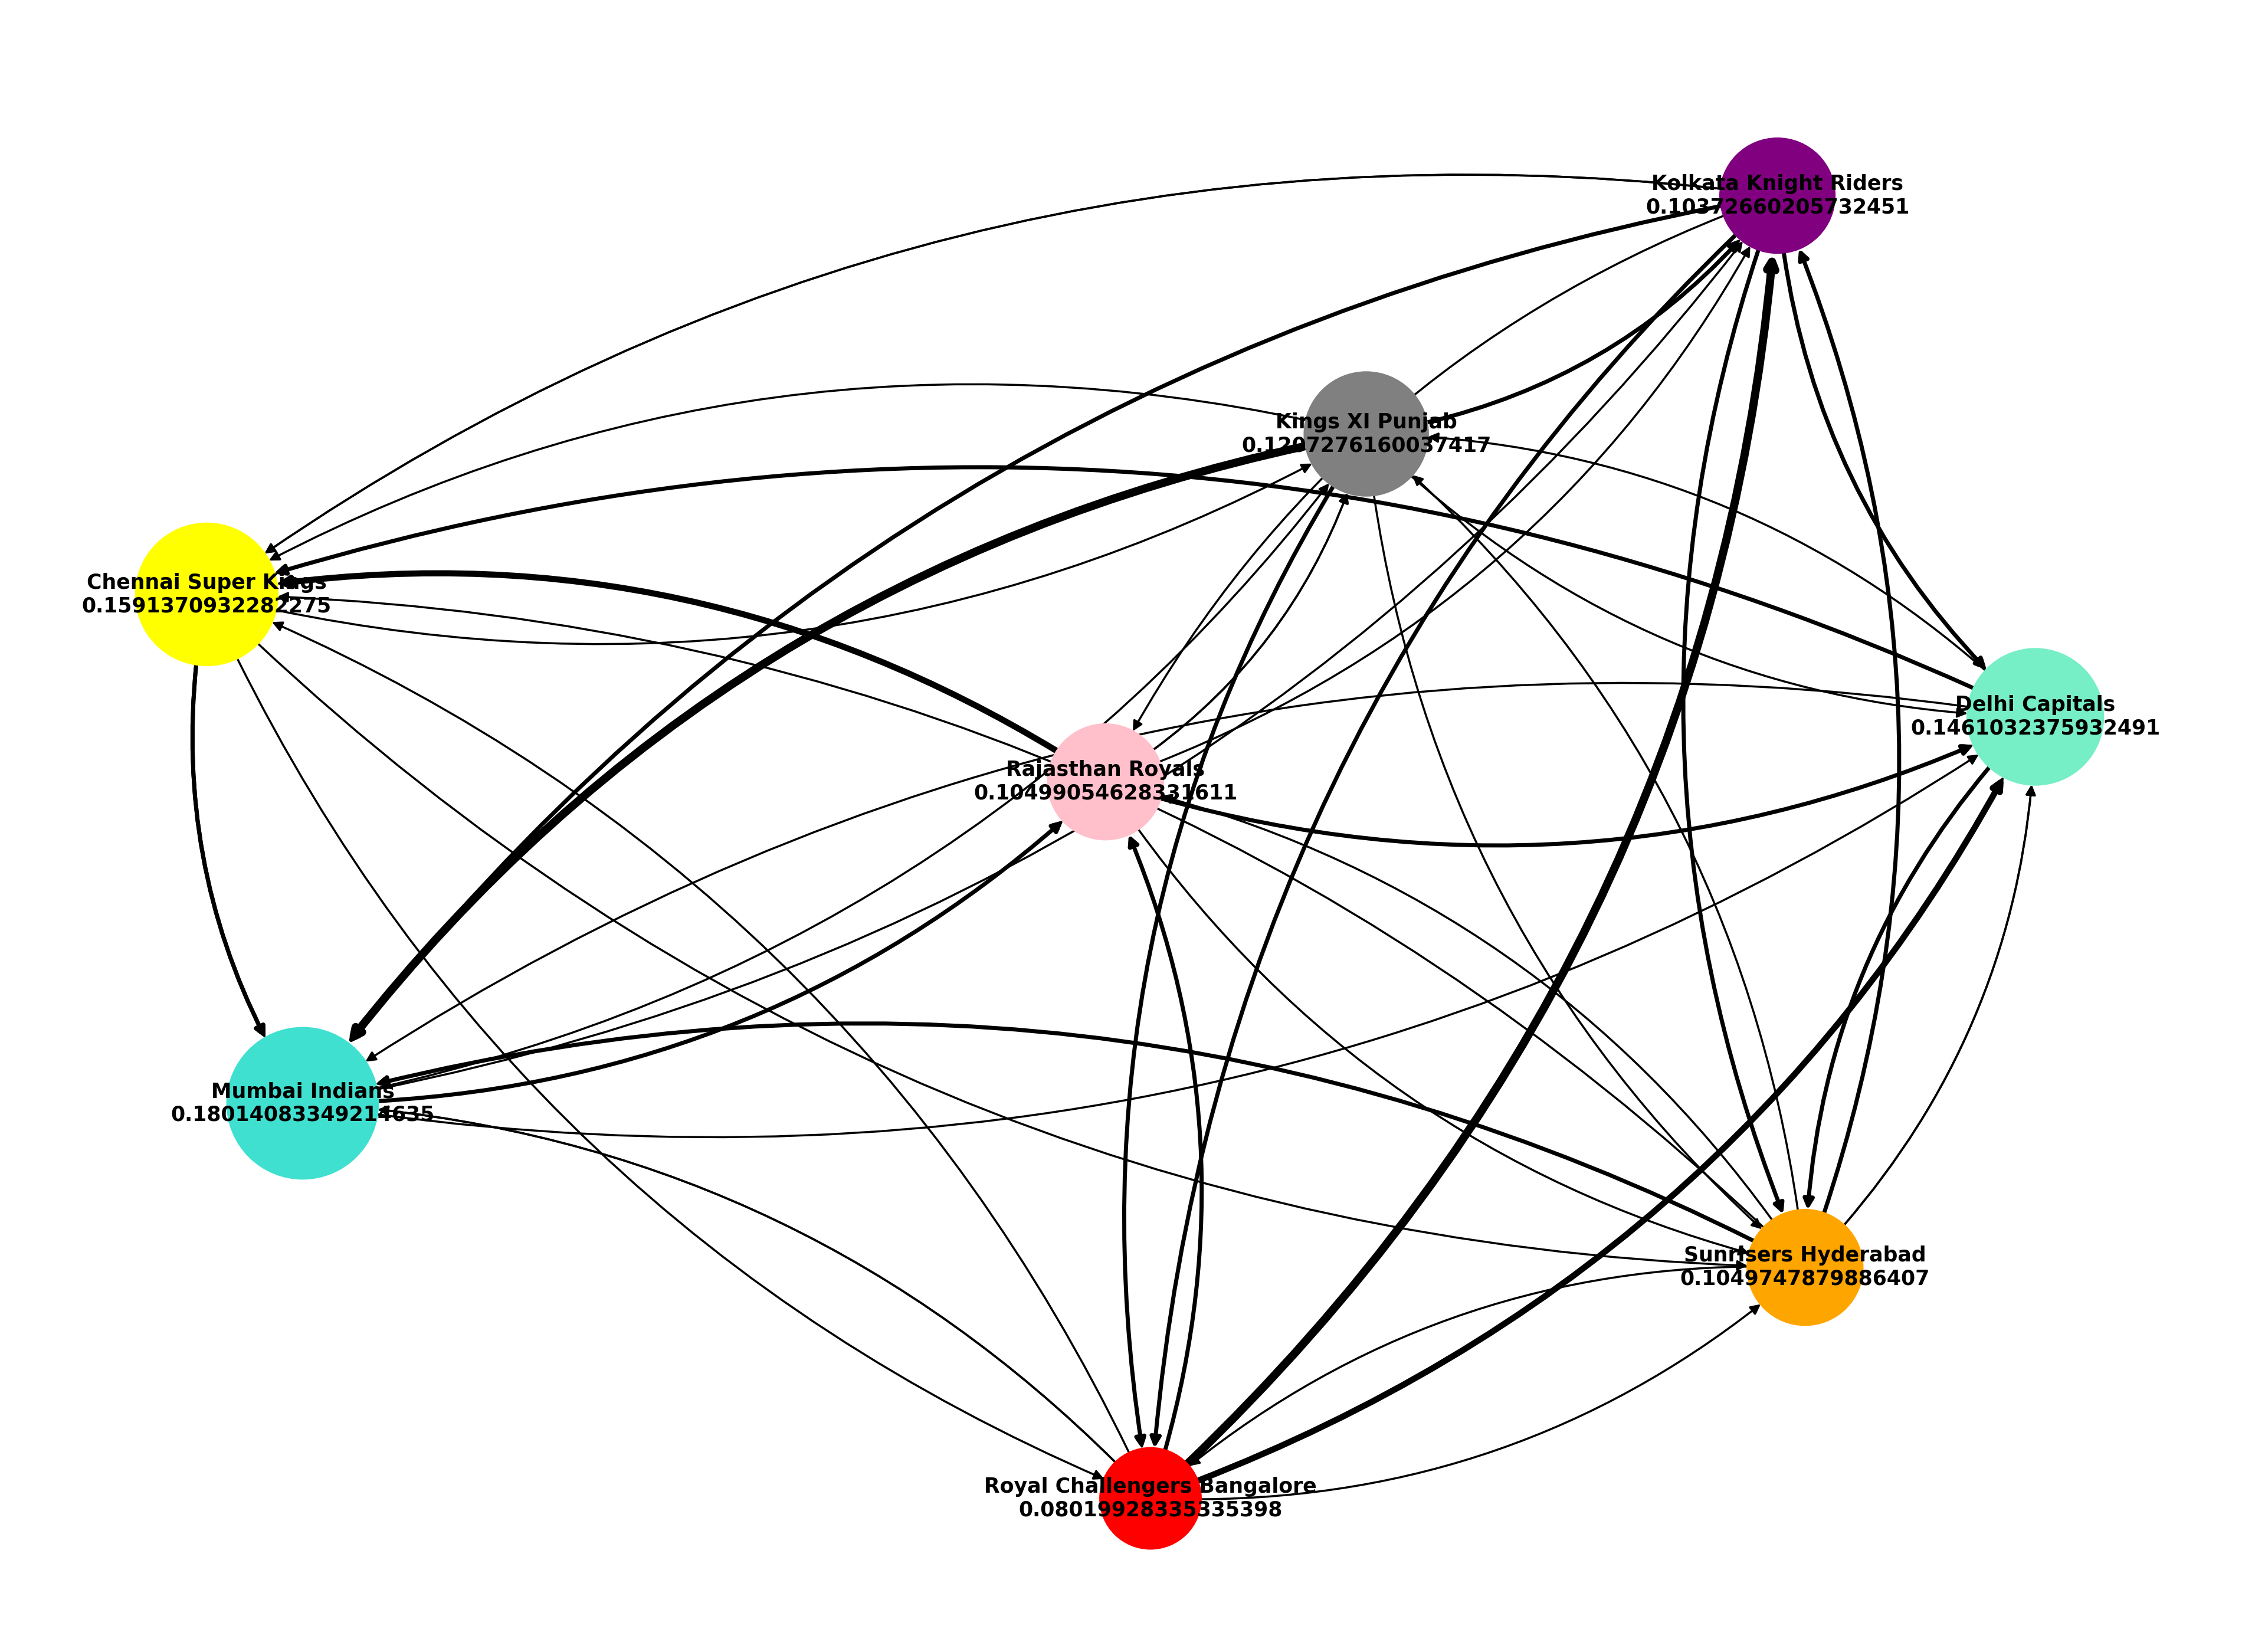

In [45]:
labeldict={}
for i in Grev.nodes():
    labeldict[i]= i+"\n"+str(nx.pagerank(L, alpha = 0.85, personalization=nst).get(i))

fig = plt.figure(1, figsize=(15, 11), dpi=250)
nx.draw(Grev, labels=labeldict,
        font_weight='heavy', font_size=10, font_color='black',
        node_color=teamcolor, node_size=[30000*i for i in sizes_2],
        connectionstyle='arc3, rad = 0.2',
        width=list(weightsL)
       )
plt.show()

In [28]:
nst = {n: L.in_degree(n)  for n in L.nodes}
#nst = {n: 1 for n in H.nodes}
print(nst)
nx.pagerank(L, alpha = 0.85, personalization=nst).get('Royal Challengers Bangalore')

{'Royal Challengers Bangalore': 4, 'Chennai Super Kings': 6, 'Delhi Capitals': 6, 'Rajasthan Royals': 4, 'Kings XI Punjab': 5, 'Kolkata Knight Riders': 5, 'Sunrisers Hyderabad': 6, 'Mumbai Indians': 6}


0.08019928335335398

In [42]:
print(nst)

{'Royal Challengers Bangalore': 4, 'Chennai Super Kings': 6, 'Delhi Capitals': 6, 'Rajasthan Royals': 4, 'Kings XI Punjab': 5, 'Kolkata Knight Riders': 5, 'Sunrisers Hyderabad': 6, 'Mumbai Indians': 6}


In [8]:
nx.pagerank(L, alpha = 0.85, personalization=nst)

{'Royal Challengers Bangalore': 0.08019928335335398,
 'Chennai Super Kings': 0.1591370932282275,
 'Delhi Capitals': 0.1461032375932491,
 'Rajasthan Royals': 0.10499054628331611,
 'Kings XI Punjab': 0.1207276160037417,
 'Kolkata Knight Riders': 0.10372660205732451,
 'Sunrisers Hyderabad': 0.1049747879886407,
 'Mumbai Indians': 0.18014083349214635}

In [11]:
sizes=list(nx.pagerank(L, alpha = 0.85, personalization=nst).values())
print(sizes)

[0.08019928335335398, 0.1591370932282275, 0.1461032375932491, 0.10499054628331611, 0.1207276160037417, 0.10372660205732451, 0.1049747879886407, 0.18014083349214635]


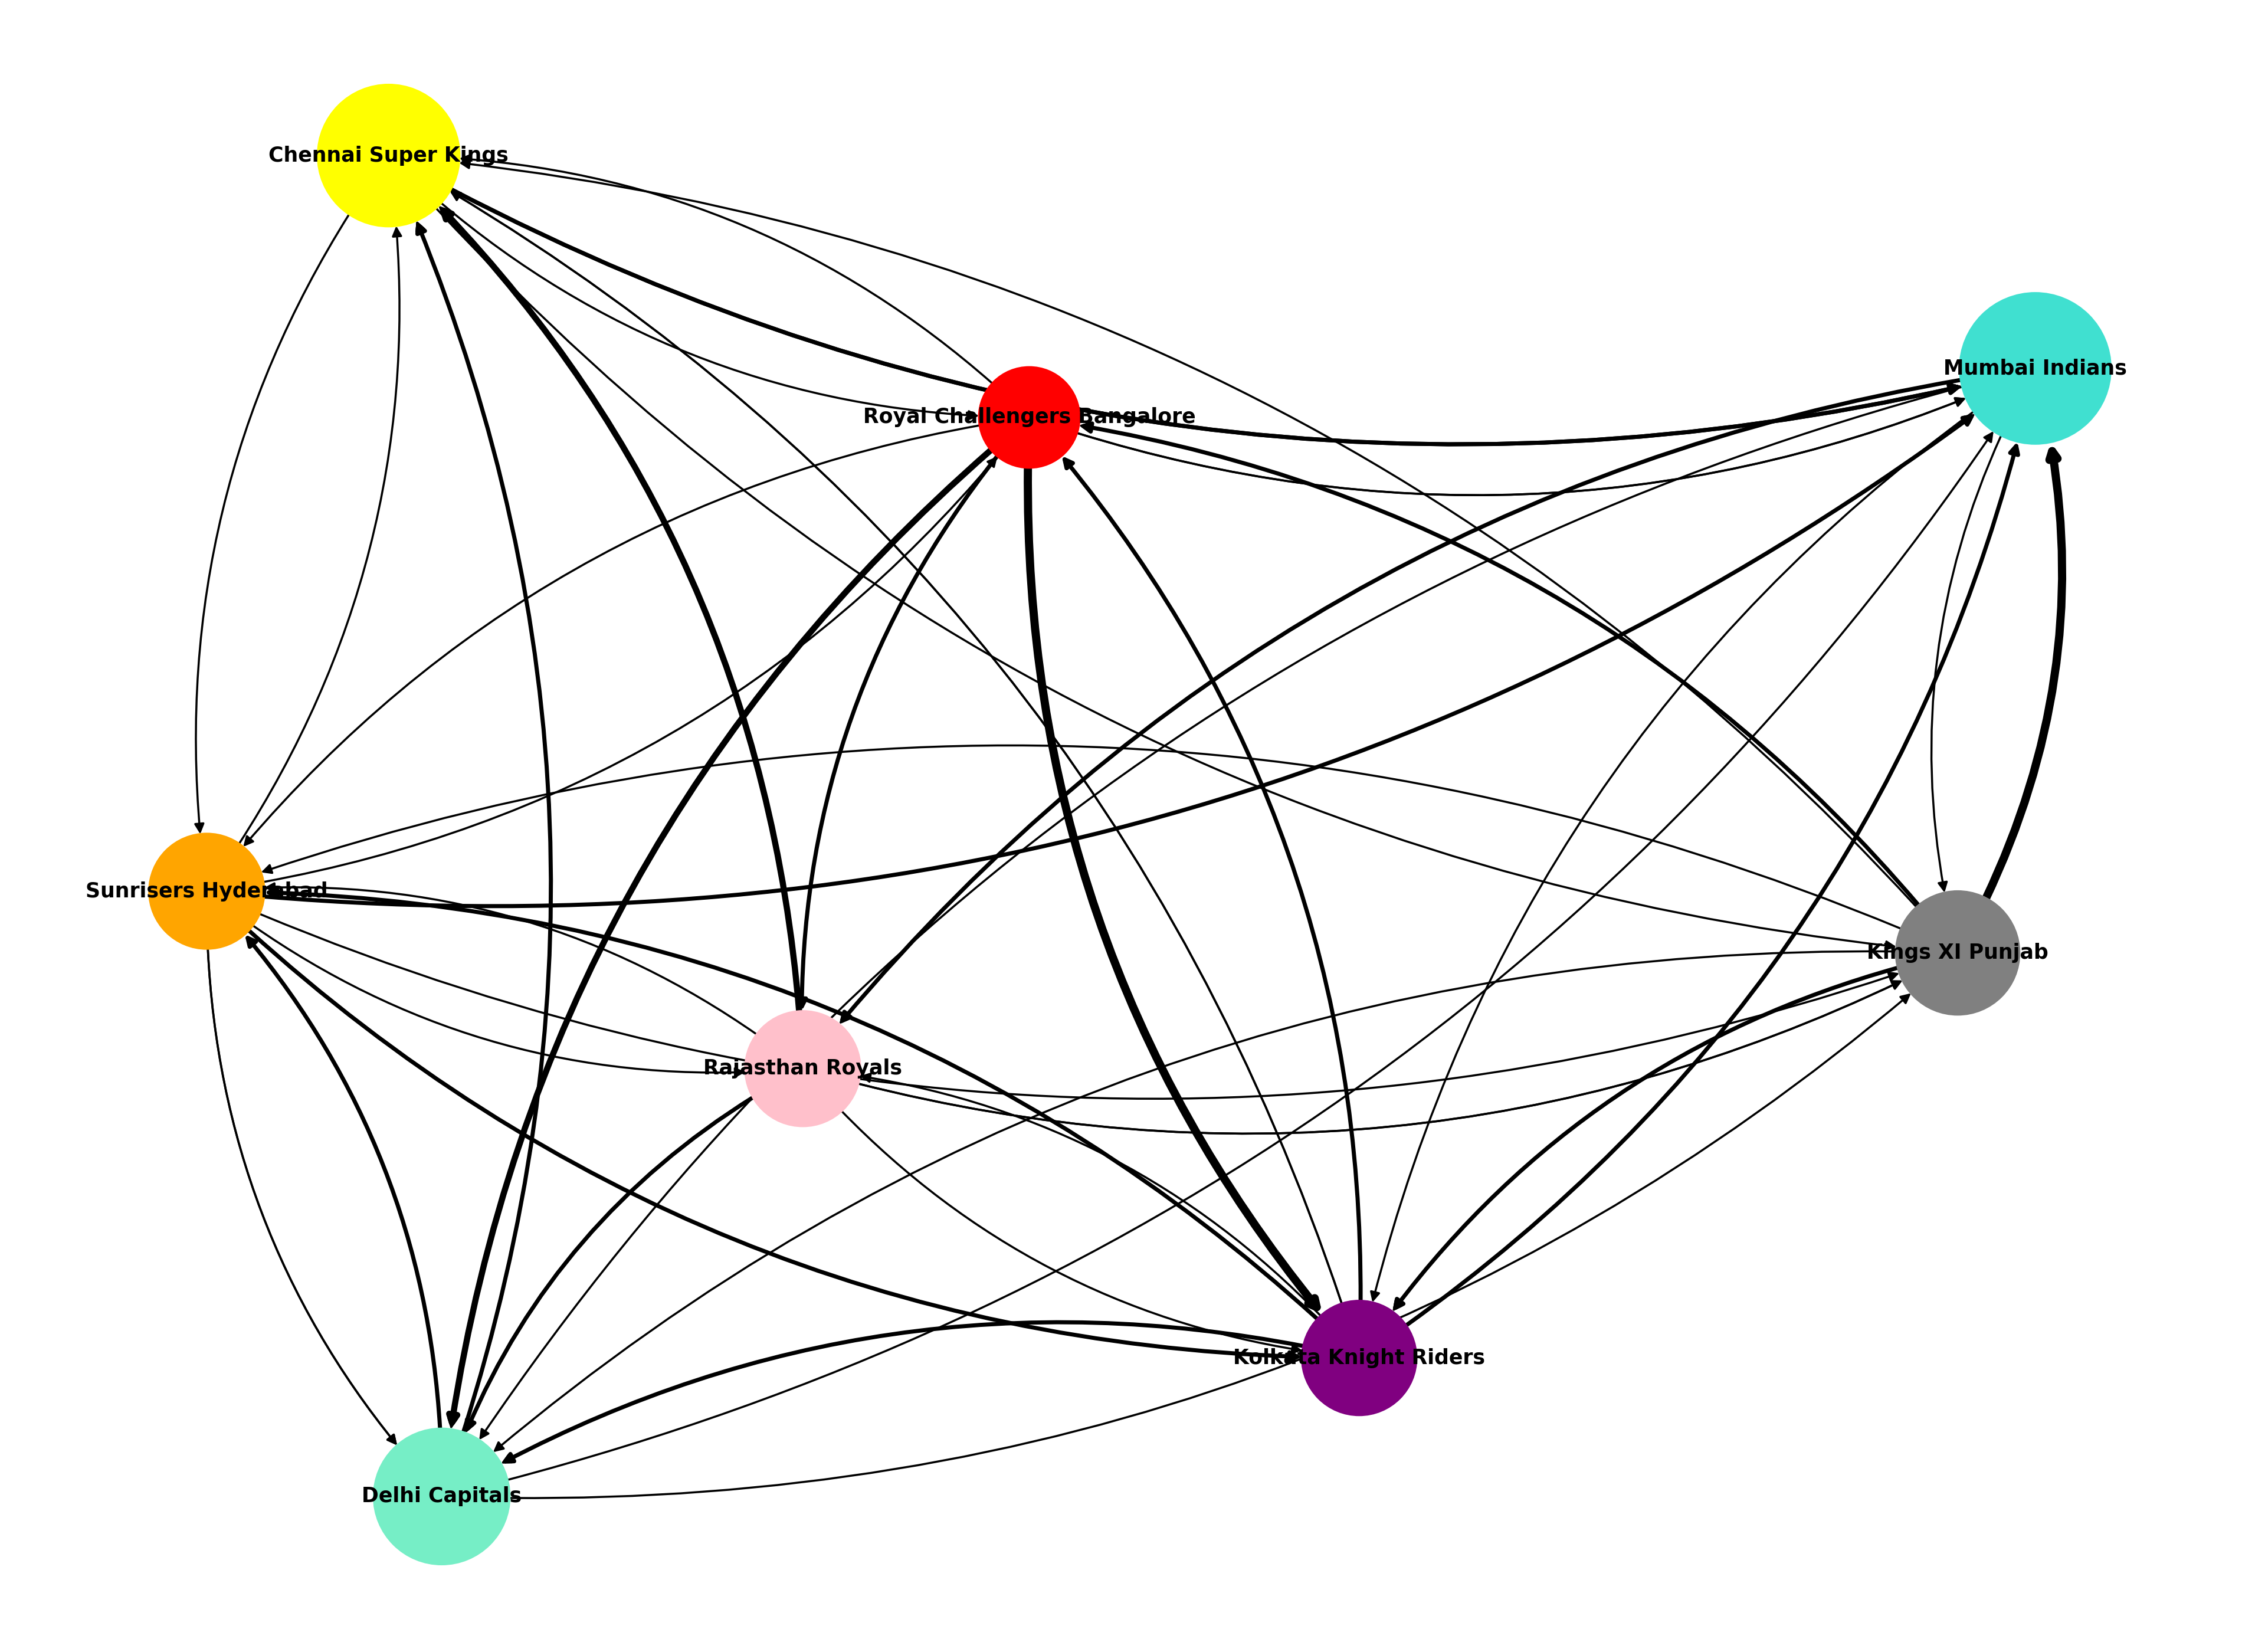

In [24]:
fig = plt.figure(1, figsize=(15, 11), dpi=250)
nx.draw(Grev, with_labels=True,
        font_weight='bold', font_size=10, font_color='black',
        node_color=teamcolor, node_size=[30000*i for i in sizes_2],
        connectionstyle='arc3, rad = 0.2',
        width=list(weightsL)
       )
plt.show()

In [9]:
Grev.nodes()

NodeView(('Chennai Super Kings', 'Royal Challengers Bangalore', 'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Delhi Capitals', 'Mumbai Indians', 'Kings XI Punjab', 'Rajasthan Royals'))

In [12]:
sizes_2=[]
sizes_2.append(sizes[1])
sizes_2.append(sizes[0])
sizes_2.append(sizes[5])
sizes_2.append(sizes[6])
sizes_2.append(sizes[2])
sizes_2.append(sizes[7])
sizes_2.append(sizes[4])
sizes_2.append(sizes[3])

In [44]:
sizes_2

[0.1591370932282275,
 0.08019928335335398,
 0.10372660205732451,
 0.1049747879886407,
 0.1461032375932491,
 0.18014083349214635,
 0.1207276160037417,
 0.10499054628331611]

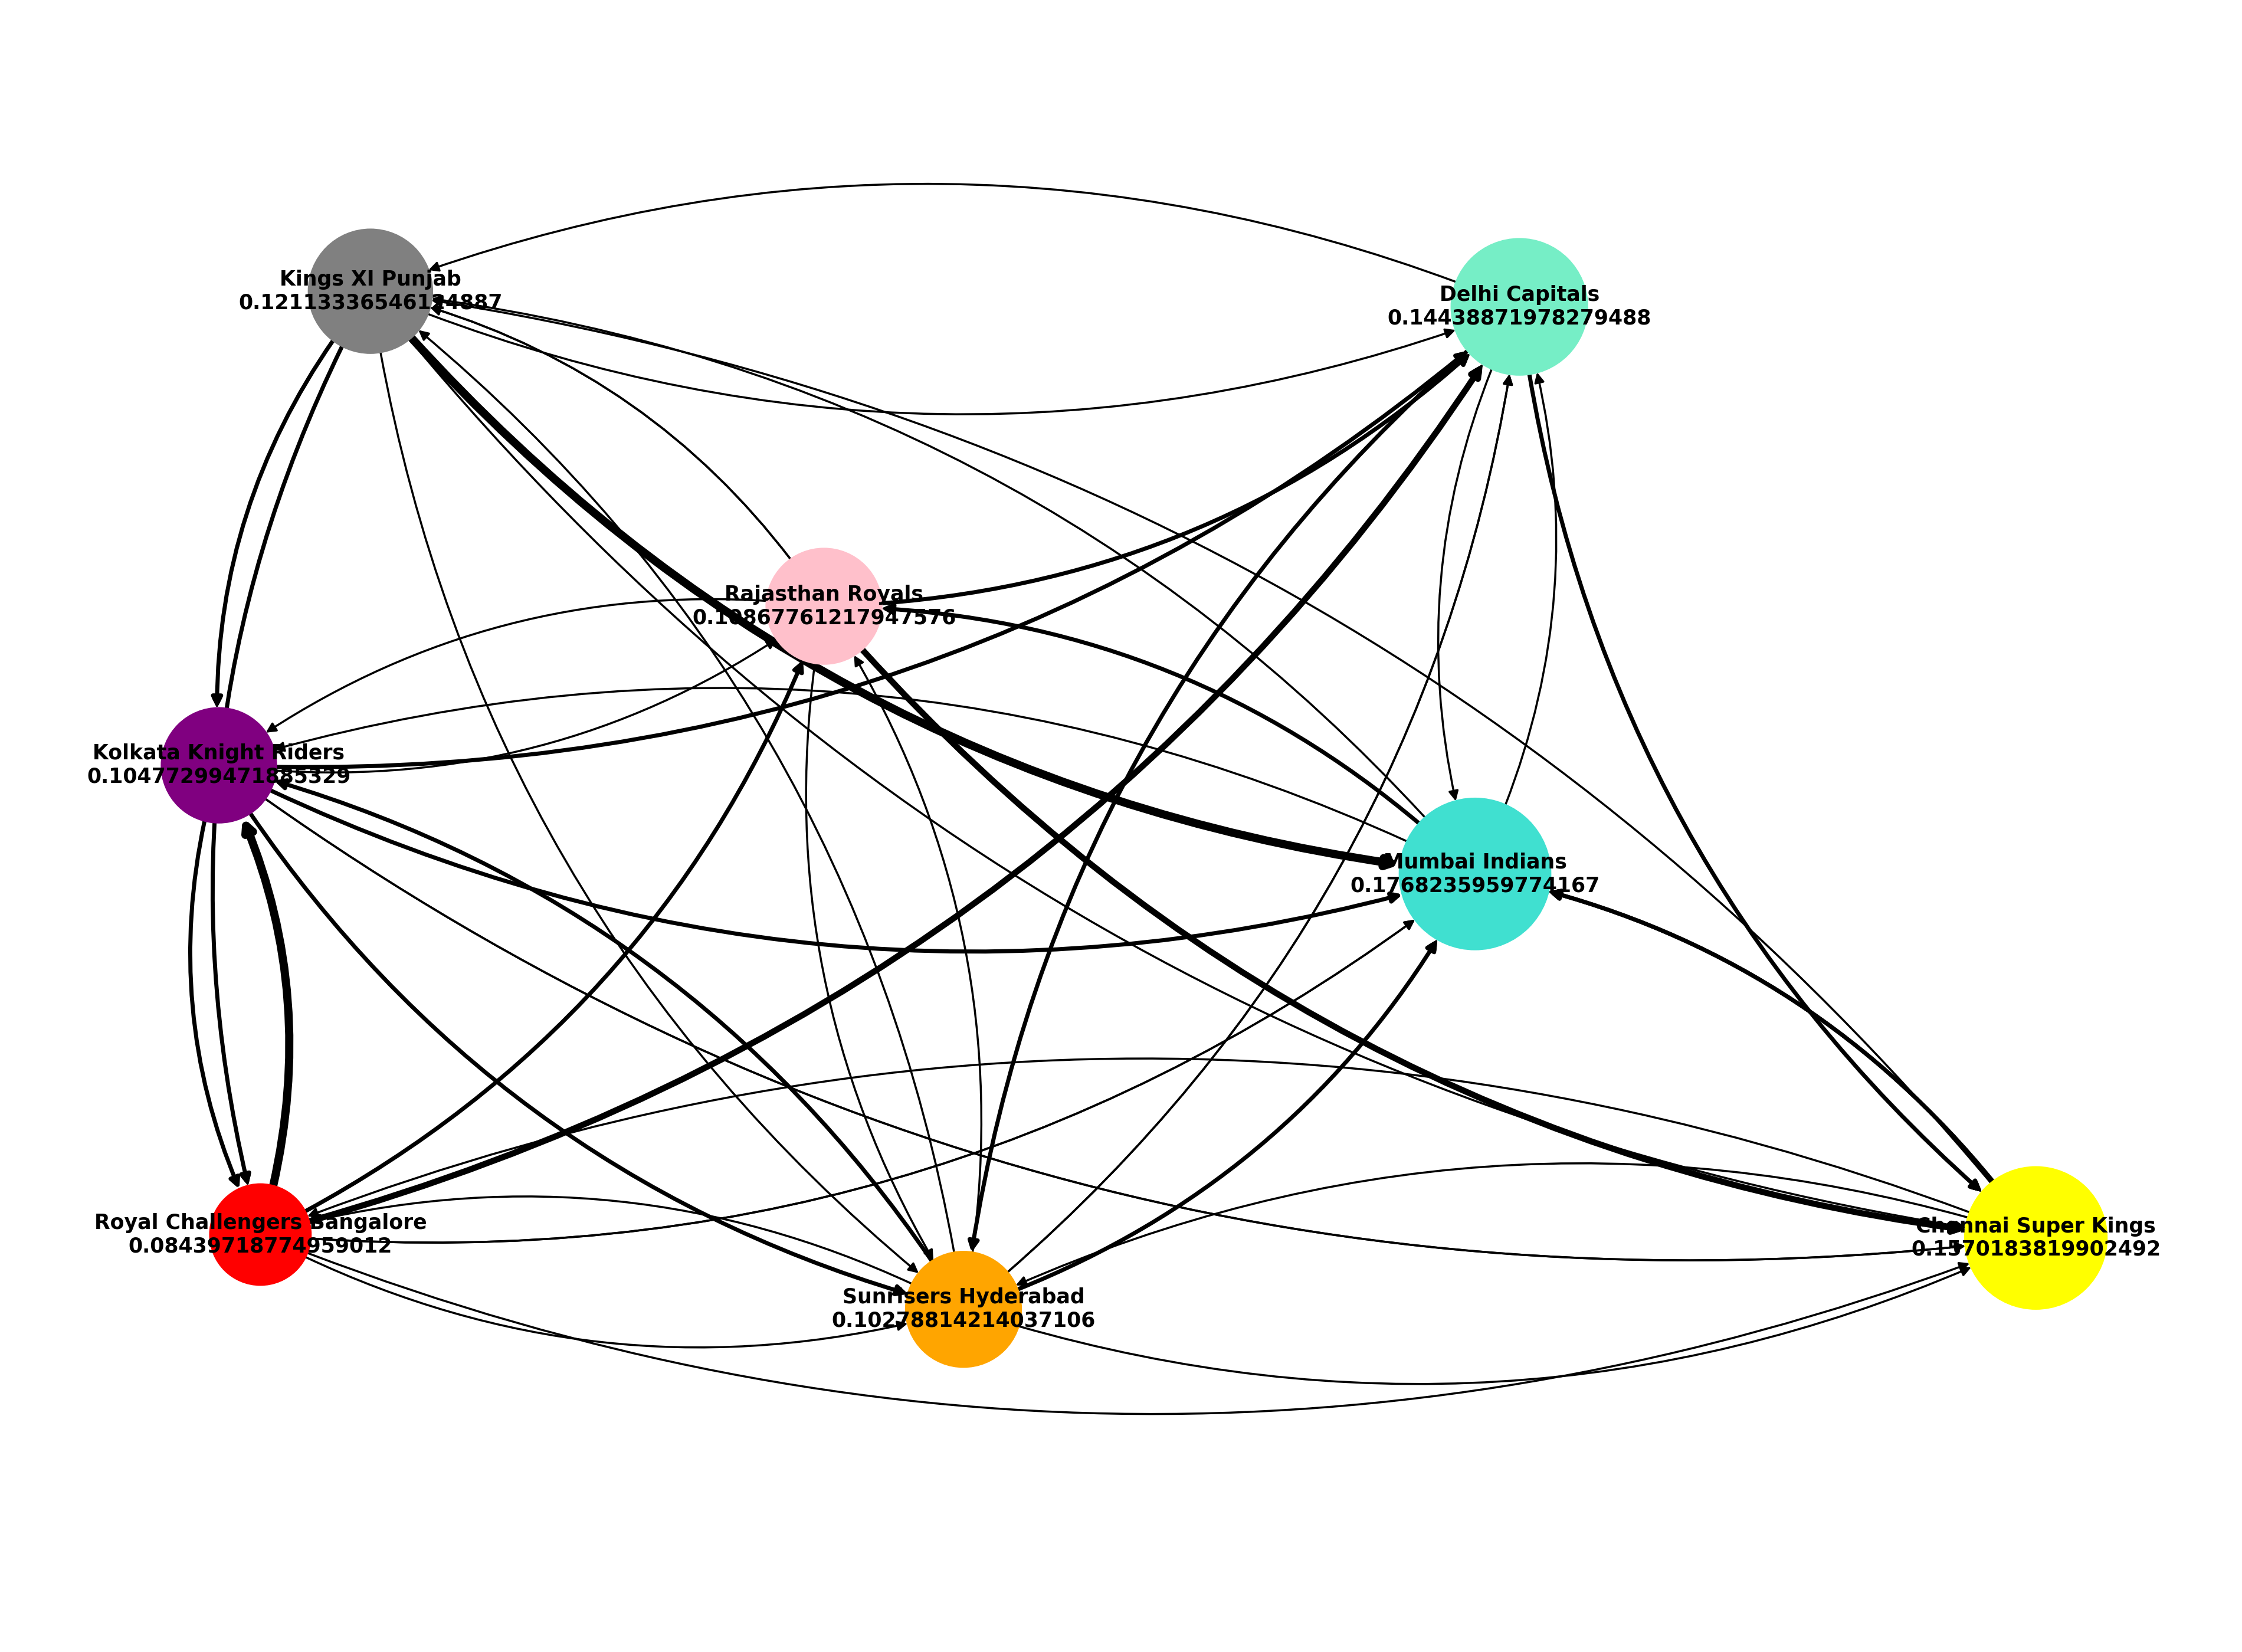

In [46]:
labeldict={}
for i in Grev.nodes():
    labeldict[i]= i+"\n"+str(nx.pagerank(L, alpha = 0.85).get(i))

fig = plt.figure(1, figsize=(15, 11), dpi=250)
nx.draw(Grev, labels=labeldict,
        font_weight='heavy', font_size=10, font_color='black',
        node_color=teamcolor, node_size=[30000*i for i in sizes_2],
        connectionstyle='arc3, rad = 0.2',
        width=list(weightsL)
       )
plt.show()

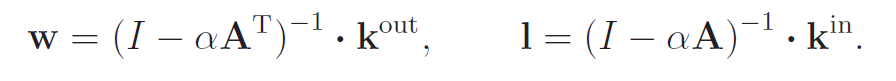

### J Park & M Newman Algorithm

In [91]:
def win(alpha,A,k_out):
    return np.matmul(inv(np.identity(8)-alpha*np.transpose(nx.adjacency_matrix(A))),k_out)
def lose(alpha,A,k_in):
    return np.matmul(inv(np.identity(8)-alpha*nx.adjacency_matrix(A)),k_in)

In [93]:
k_in = np.transpose(np.array([Grev.in_degree(i) for i in Grev.nodes]))
k_out = np.transpose(np.array([Grev.out_degree(i) for i in Grev.nodes]))

In [98]:
win(0.2,G,k_in)-lose(0.2,G,k_out)

matrix([[ 11.41220847, -14.12698002,  -9.8566299 , -15.07219678,
          12.1860889 ,  24.34353336,  -8.86032667, -13.32274118]])

In [94]:
Grev.nodes()

NodeView(('Chennai Super Kings', 'Royal Challengers Bangalore', 'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Delhi Capitals', 'Mumbai Indians', 'Kings XI Punjab', 'Rajasthan Royals'))